In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.manifold import TSNE
import scipy.io
import os

from functions import *

In [2]:
#Open multiple dataset from "./data/" folder
datasets = []
for file in os.listdir("data"):
    try:
        data = scipy.io.loadmat("./data/" + file)
        data = pd.DataFrame(data["tseries"].T)
        datasets.append(data)
    except:
        print("Problem with \"" + str(file) + "\" file")

print("Uploaded " + str(len(datasets)) + " file")
df = datasets[0]

Uploaded 96 file


In [3]:
from scipy.stats import zscore
dfz = df.apply(zscore)

In [4]:
def propagation(W, alpha, D, sigma):
    id_max = 1200
    Xt = np.zeros((119, id_max))
    #x1 = np.random.random((119))       #x1 random
    x1 = dfz.T[0]                       #x1 from data
    Xt[:, 0] = x1

    Psi = np.zeros((119, id_max))

    TR = 0.7
    b = 6.6667
    for i in range(id_max-1):

        t1 = (alpha**2 + (b*x1+0.5)**2)**0.5
        t2 = (alpha**2 + (b*x1-0.5)**2)**0.5
        psi = t1 - t2

        eps = np.random.normal(0, sigma, x1.size)
        x2 = x1 + (np.dot(W, psi) - D*x1)*TR + eps

        Psi[:, i+1] = psi

        Xt[:, i+1] = x2
        x1 = x2


    dfXt = pd.DataFrame(Xt)
    simul = dfXt.T
    return simul

### Periodic signals

In [5]:
W = scipy.io.loadmat("./data_simulations/W_p.mat")["W"]
D = scipy.io.loadmat("./data_simulations/D_p.mat")["D"]
alpha = scipy.io.loadmat("./data_simulations/alpha_p.mat")["alpha"]

alpha = alpha[:, 0]
D = D[:, 0]

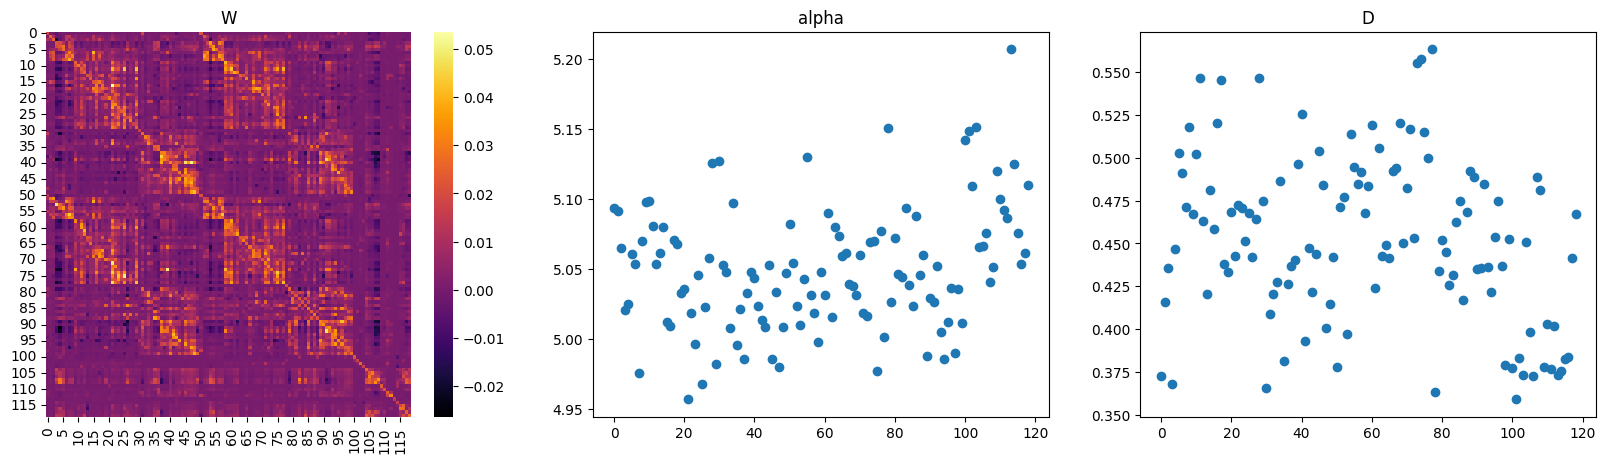

In [6]:
plt.figure(figsize=(20, 5))
plt.subplot(131)
plt.title("W")
sn.heatmap(W, cmap="inferno")

plt.subplot(132)
plt.title("alpha")
plt.scatter(np.arange(119), alpha)

plt.subplot(133)
plt.title("D")
plt.scatter(np.arange(119), D)

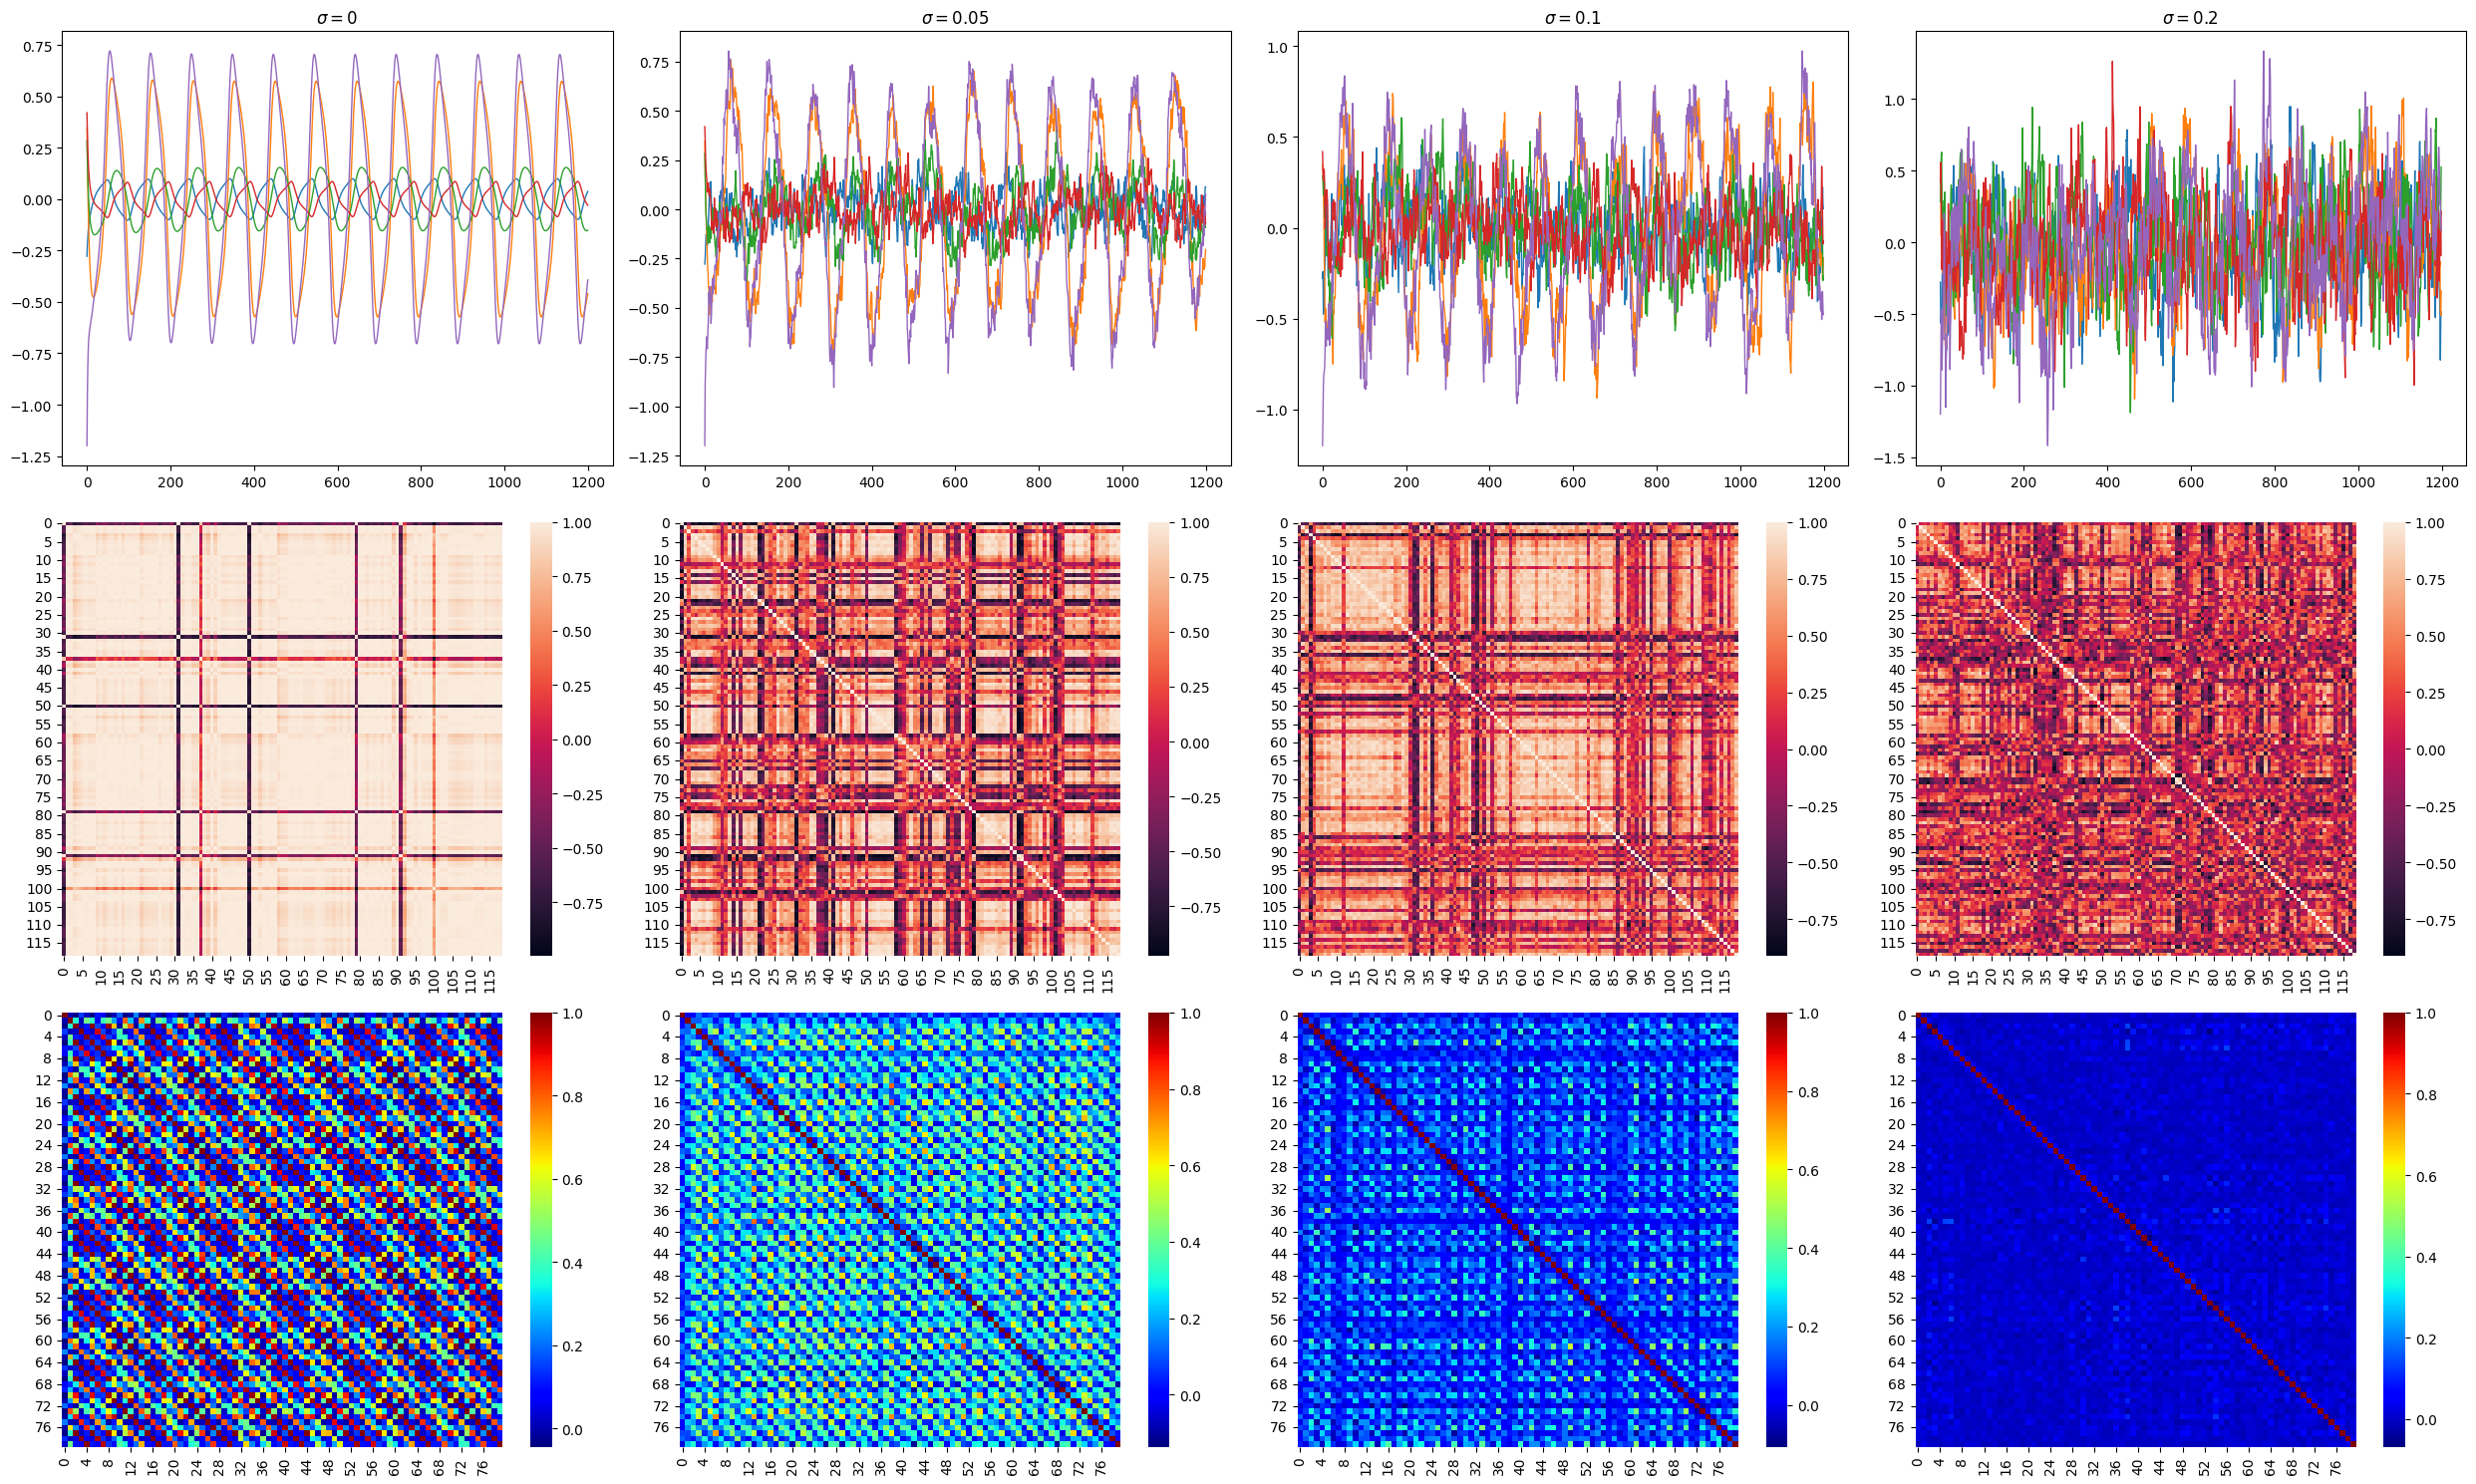

In [7]:
plt.figure(figsize=(25, 15))

plt.subplot(341)
plt.title('$\sigma = 0$')
simul = propagation(W, alpha, D, 0)
plt.plot(np.arange(len(simul[0])), simul[0], lw=1)
plt.plot(np.arange(len(simul[20])), simul[20], lw=1)
plt.plot(np.arange(len(simul[30])), simul[30], lw=1)
plt.plot(np.arange(len(simul[100])), simul[100], lw=1)
plt.plot(np.arange(len(simul[60])), simul[60], lw=1)

plt.subplot(345)
stream = dFC_stream(simul, 15)
sn.heatmap(stream[42])

plt.subplot(349)
sn.heatmap(dFC_matrix(stream), cmap="jet")


plt.subplot(342)
plt.title('$\sigma = 0.05$')
simul = propagation(W, alpha, D, 0.05)
plt.plot(np.arange(len(simul[0])), simul[0], lw=1)
plt.plot(np.arange(len(simul[20])), simul[20], lw=1)
plt.plot(np.arange(len(simul[30])), simul[30], lw=1)
plt.plot(np.arange(len(simul[100])), simul[100], lw=1)
plt.plot(np.arange(len(simul[60])), simul[60], lw=1)

plt.subplot(346)
stream = dFC_stream(simul, 15)
sn.heatmap(stream[42])

plt.subplot(3, 4, 10)
sn.heatmap(dFC_matrix(stream), cmap="jet")


plt.subplot(343)
plt.title('$\sigma = 0.1$')
simul = propagation(W, alpha, D, 0.1)
plt.plot(np.arange(len(simul[0])), simul[0], lw=1)
plt.plot(np.arange(len(simul[20])), simul[20], lw=1)
plt.plot(np.arange(len(simul[30])), simul[30], lw=1)
plt.plot(np.arange(len(simul[100])), simul[100], lw=1)
plt.plot(np.arange(len(simul[60])), simul[60], lw=1)

plt.subplot(347)
stream = dFC_stream(simul, 15)
sn.heatmap(stream[42])

plt.subplot(3, 4, 11)
sn.heatmap(dFC_matrix(stream), cmap="jet")


plt.subplot(344)
plt.title('$\sigma = 0.2$')
simul = propagation(W, alpha, D, 0.2)
plt.plot(np.arange(len(simul[0])), simul[0], lw=1)
plt.plot(np.arange(len(simul[20])), simul[20], lw=1)
plt.plot(np.arange(len(simul[30])), simul[30], lw=1)
plt.plot(np.arange(len(simul[100])), simul[100], lw=1)
plt.plot(np.arange(len(simul[60])), simul[60], lw=1)

plt.subplot(348)
stream = dFC_stream(simul, 15)
sn.heatmap(stream[42])

plt.subplot(3, 4, 12)
sn.heatmap(dFC_matrix(stream), cmap="jet")


plt.tight_layout()

In [8]:
simul = propagation(W, alpha, D, 0.1)
vz_short = pooled_v_stream(simul, 3, 8)
vz_mid = pooled_v_stream(simul, 9, 32)
vz_long = pooled_v_stream(simul, 33, 105)

(0.0, 1.1)

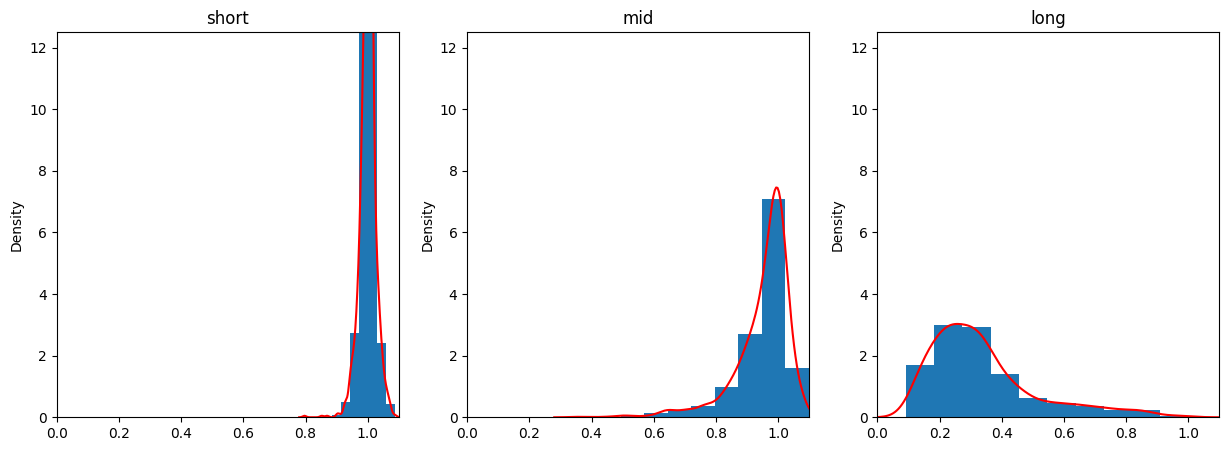

In [9]:
plt.figure(figsize=(15, 5))
plt.subplot(131)
plt.title("short")
plt.hist(vz_short, density=True)
sn.kdeplot(vz_short, color="red")
plt.ylim((0, 12.5))
plt.xlim((0, 1.1))

plt.subplot(132)
plt.title("mid")
plt.hist(vz_mid, density=True)
sn.kdeplot(vz_mid, color="red")
plt.ylim((0, 12.5))
plt.xlim((0, 1.1))

plt.subplot(133)
plt.title("long")
plt.hist(vz_long, density=True)
sn.kdeplot(vz_long, color="red")
plt.ylim((0, 12.5))
plt.xlim((0, 1.1))

### Non-periodical signals

In [10]:
W = scipy.io.loadmat("./data_simulations/W_np.mat")["W"]
D = scipy.io.loadmat("./data_simulations/D_np.mat")["D"]
alpha = scipy.io.loadmat("./data_simulations/alpha_np.mat")["alpha"]

alpha = alpha[:, 0]
D = D[:, 0]

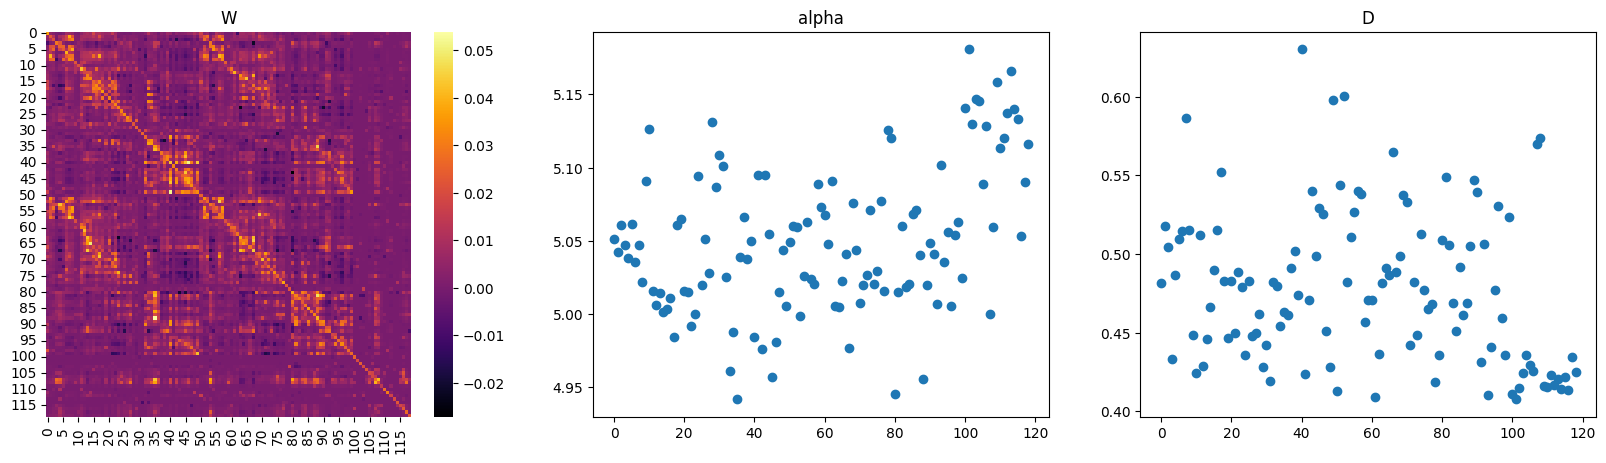

In [11]:
plt.figure(figsize=(20, 5))
plt.subplot(131)
plt.title("W")
sn.heatmap(W, cmap="inferno")

plt.subplot(132)
plt.title("alpha")
plt.scatter(np.arange(119), alpha)

plt.subplot(133)
plt.title("D")
plt.scatter(np.arange(119), D)

c:\Users\Paolo Lapo\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
c:\Users\Paolo Lapo\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


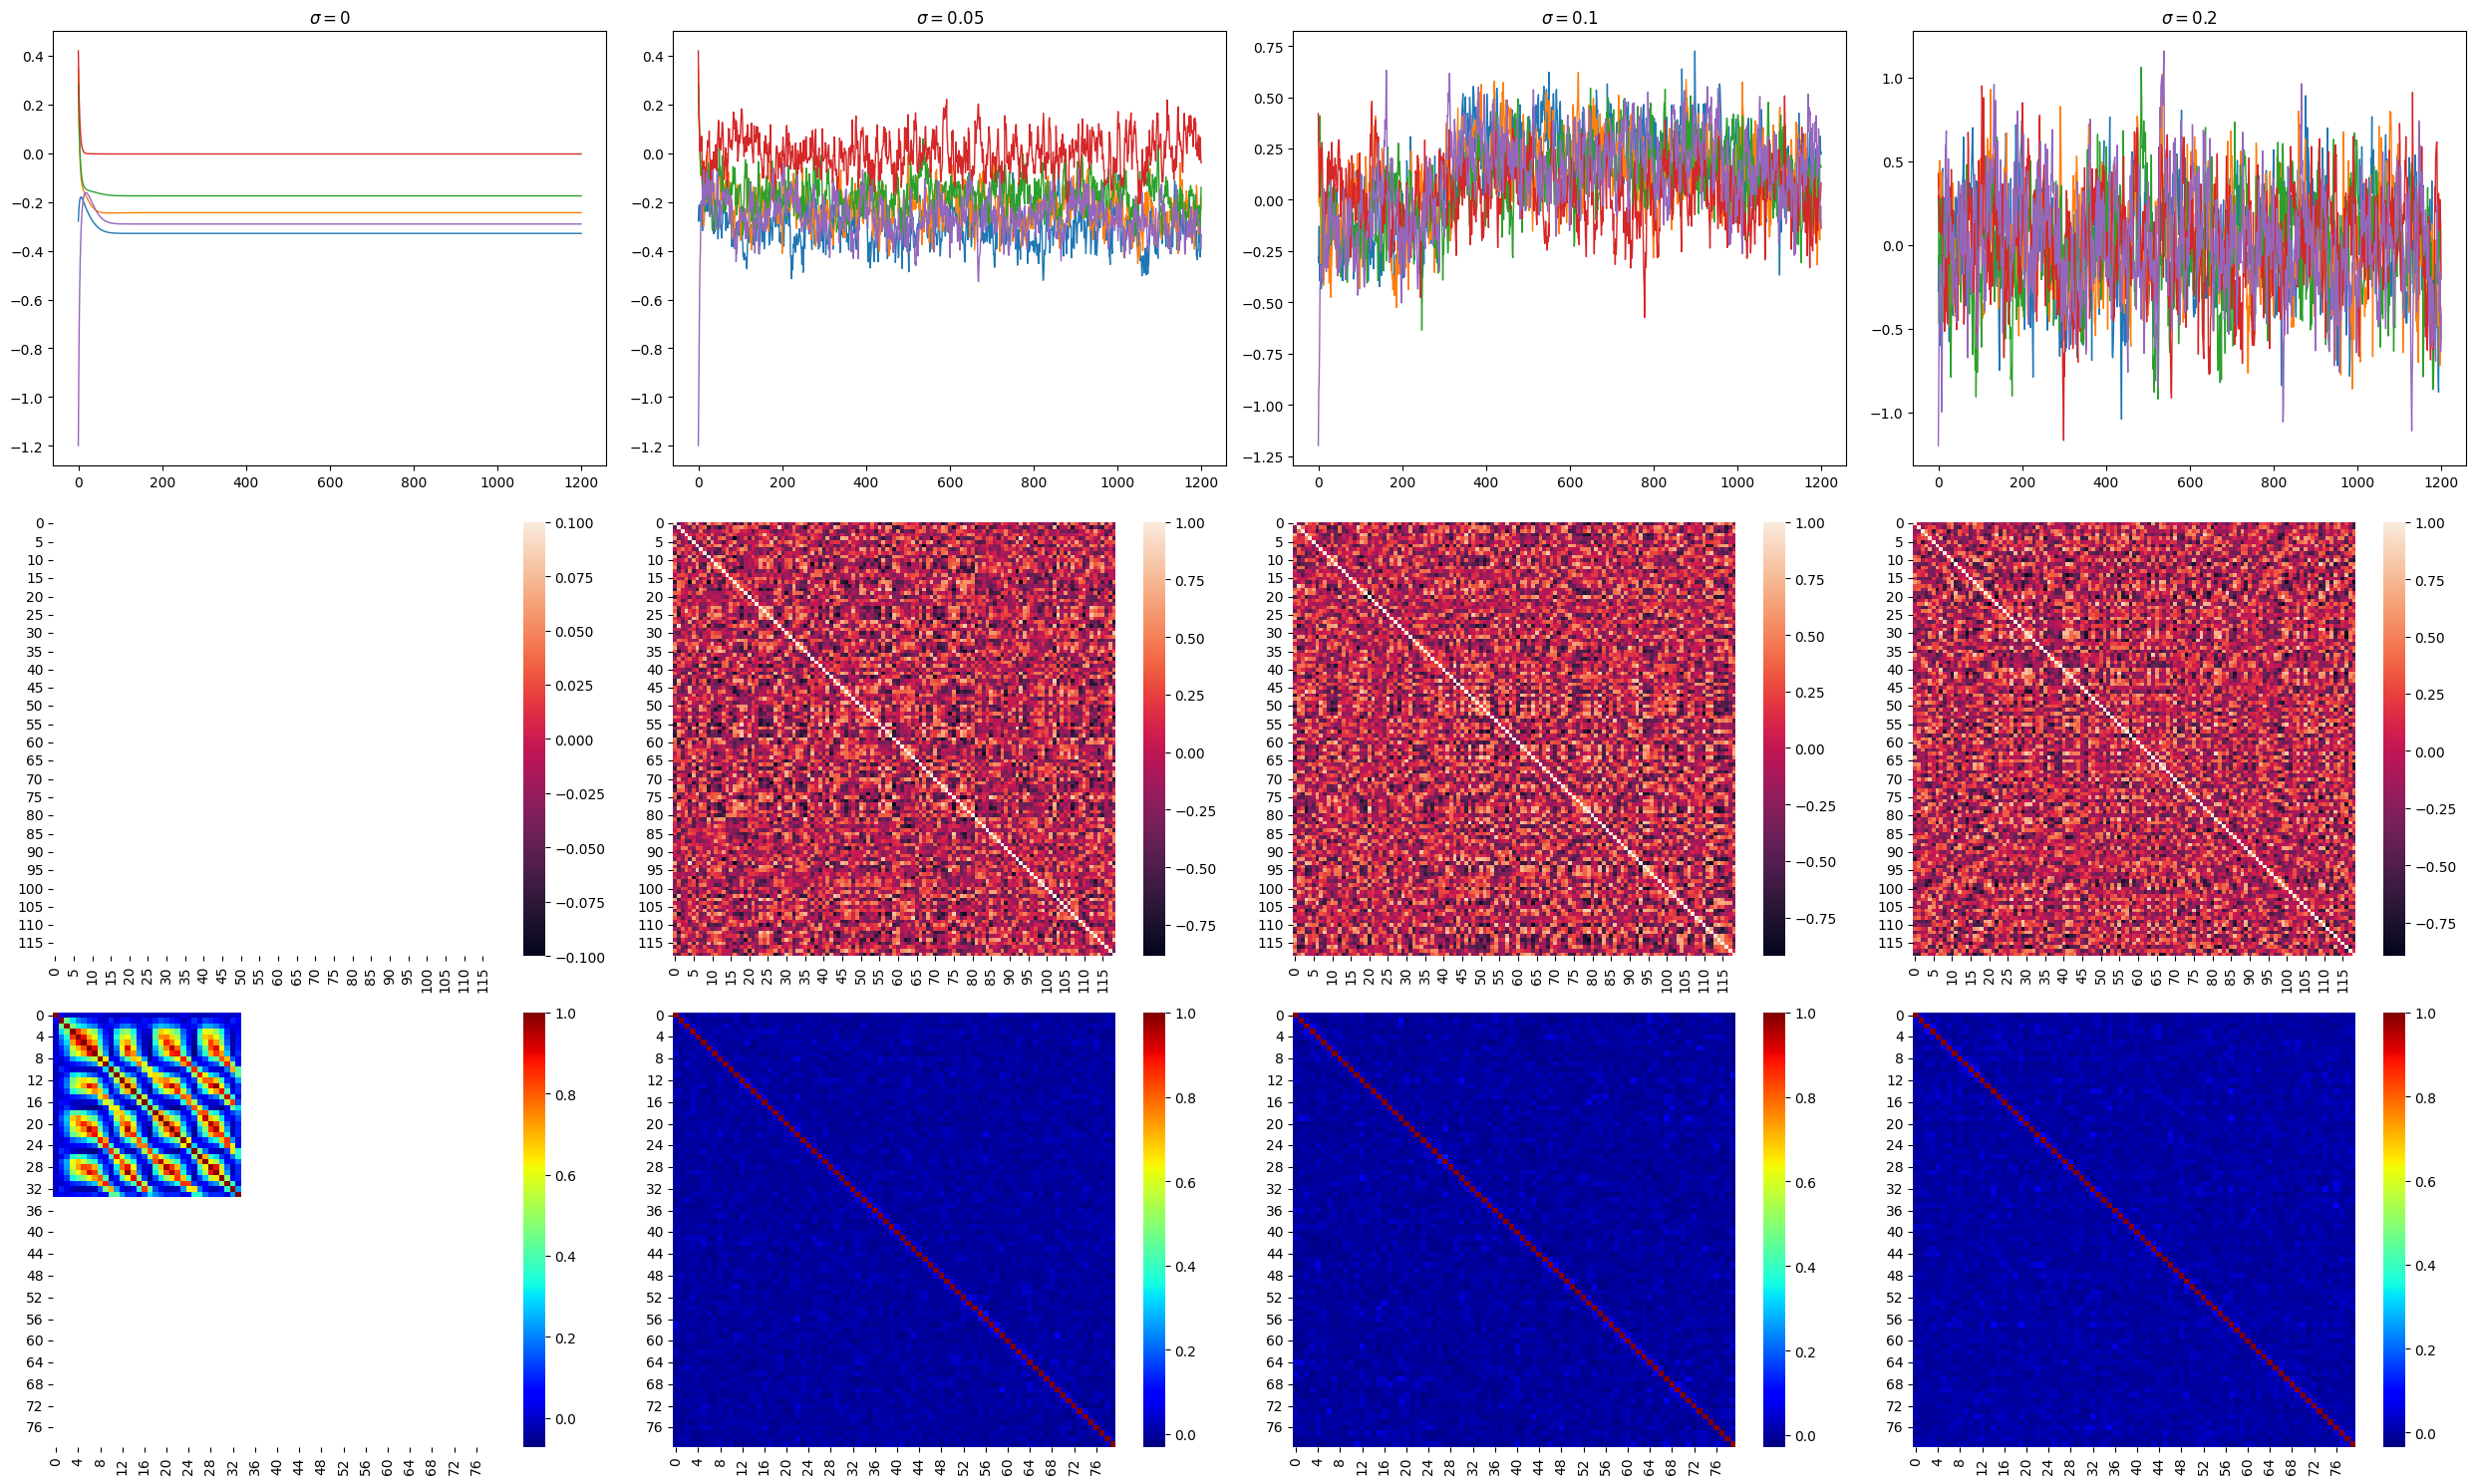

In [12]:
plt.figure(figsize=(25, 15))

plt.subplot(341)
plt.title('$\sigma = 0$')
simul = propagation(W, alpha, D, 0)
plt.plot(np.arange(len(simul[0])), simul[0], lw=1)
plt.plot(np.arange(len(simul[20])), simul[20], lw=1)
plt.plot(np.arange(len(simul[30])), simul[30], lw=1)
plt.plot(np.arange(len(simul[100])), simul[100], lw=1)
plt.plot(np.arange(len(simul[60])), simul[60], lw=1)

plt.subplot(345)
stream = dFC_stream(simul, 15)
sn.heatmap(stream[42])

plt.subplot(349)
sn.heatmap(dFC_matrix(stream), cmap="jet")


plt.subplot(342)
plt.title('$\sigma = 0.05$')
simul = propagation(W, alpha, D, 0.05)
plt.plot(np.arange(len(simul[0])), simul[0], lw=1)
plt.plot(np.arange(len(simul[20])), simul[20], lw=1)
plt.plot(np.arange(len(simul[30])), simul[30], lw=1)
plt.plot(np.arange(len(simul[100])), simul[100], lw=1)
plt.plot(np.arange(len(simul[60])), simul[60], lw=1)

plt.subplot(346)
stream = dFC_stream(simul, 15)
sn.heatmap(stream[42])

plt.subplot(3, 4, 10)
sn.heatmap(dFC_matrix(stream), cmap="jet")


plt.subplot(343)
plt.title('$\sigma = 0.1$')
simul = propagation(W, alpha, D, 0.1)
plt.plot(np.arange(len(simul[0])), simul[0], lw=1)
plt.plot(np.arange(len(simul[20])), simul[20], lw=1)
plt.plot(np.arange(len(simul[30])), simul[30], lw=1)
plt.plot(np.arange(len(simul[100])), simul[100], lw=1)
plt.plot(np.arange(len(simul[60])), simul[60], lw=1)

plt.subplot(347)
stream = dFC_stream(simul, 15)
sn.heatmap(stream[42])

plt.subplot(3, 4, 11)
sn.heatmap(dFC_matrix(stream), cmap="jet")


plt.subplot(344)
plt.title('$\sigma = 0.2$')
simul = propagation(W, alpha, D, 0.2)
plt.plot(np.arange(len(simul[0])), simul[0], lw=1)
plt.plot(np.arange(len(simul[20])), simul[20], lw=1)
plt.plot(np.arange(len(simul[30])), simul[30], lw=1)
plt.plot(np.arange(len(simul[100])), simul[100], lw=1)
plt.plot(np.arange(len(simul[60])), simul[60], lw=1)

plt.subplot(348)
stream = dFC_stream(simul, 15)
sn.heatmap(stream[42])

plt.subplot(3, 4, 12)
sn.heatmap(dFC_matrix(stream), cmap="jet")


plt.tight_layout()

In [13]:
simul = propagation(W, alpha, D, 0.1)
vz_short = pooled_v_stream(simul, 3, 8)
vz_mid = pooled_v_stream(simul, 9, 32)
vz_long = pooled_v_stream(simul, 33, 105)

(0.0, 1.1)

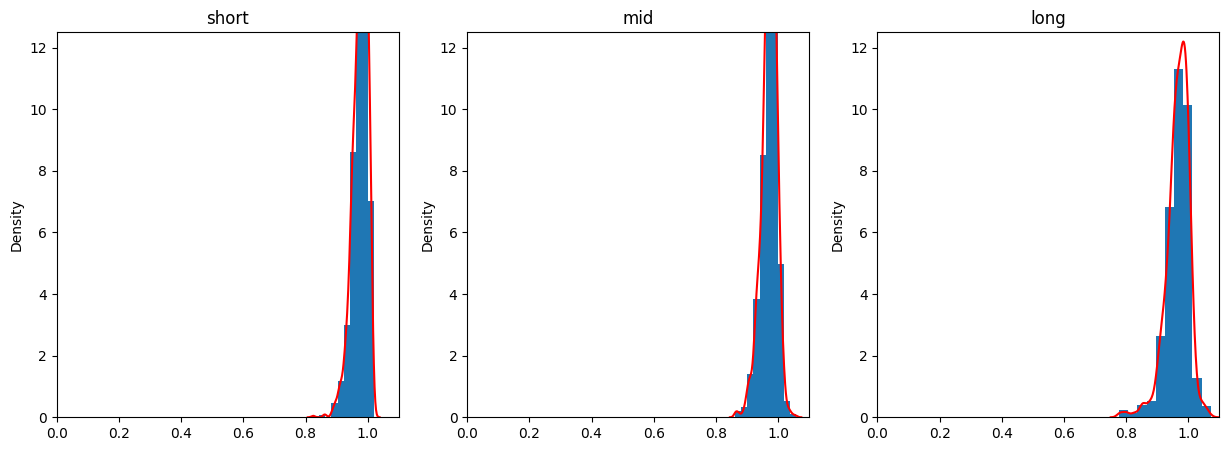

In [14]:
plt.figure(figsize=(15, 5))
plt.subplot(131)
plt.title("short")
plt.hist(vz_short, density=True)
sn.kdeplot(vz_short, color="red")
plt.ylim((0, 12.5))
plt.xlim((0, 1.1))

plt.subplot(132)
plt.title("mid")
plt.hist(vz_mid, density=True)
sn.kdeplot(vz_mid, color="red")
plt.ylim((0, 12.5))
plt.xlim((0, 1.1))

plt.subplot(133)
plt.title("long")
plt.hist(vz_long, density=True)
sn.kdeplot(vz_long, color="red")
plt.ylim((0, 12.5))
plt.xlim((0, 1.1))